In [1]:
#loading a dataset
df=pd.read_csv("C:\\Users\\Pratik1\Desktop\dataset\\data's\\housing.csv")
df

<IPython.core.display.Javascript object>

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


In [2]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [3]:
#check of na values
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [4]:
df.isnull().any()

RM         False
LSTAT      False
PTRATIO    False
MEDV       False
dtype: bool

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

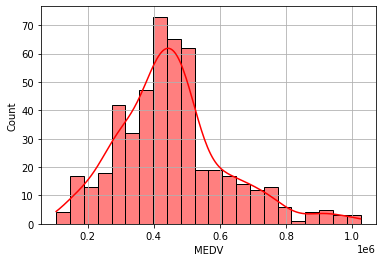

In [5]:
#histplot of output column
sns.histplot(df['MEDV'],kde='True',color='r')
plt.grid()

<AxesSubplot:>

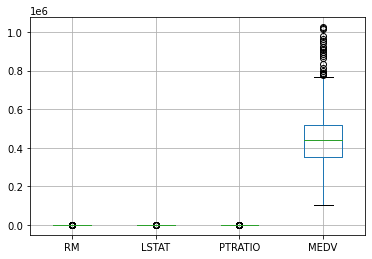

In [6]:
#info of outlier
df.boxplot()

In [7]:
#outlier treatment
Q1=df.quantile(0.25)
print(Q1)
Q2=df.quantile(0.50)
print(Q2)
Q3=df.quantile(0.75)
print(Q3)
IQR=Q3-Q1
print(IQR)

RM              5.88
LSTAT           7.37
PTRATIO        17.40
MEDV       350700.00
Name: 0.25, dtype: float64
RM              6.185
LSTAT          11.690
PTRATIO        19.100
MEDV       438900.000
Name: 0.5, dtype: float64
RM              6.575
LSTAT          17.120
PTRATIO        20.200
MEDV       518700.000
Name: 0.75, dtype: float64
RM              0.695
LSTAT           9.750
PTRATIO         2.800
MEDV       168000.000
dtype: float64


In [8]:
#range of outlier
(df<Q1-IQR*1.5)|(df>Q1-IQR*1.5)

,RM,LSTAT,PTRATIO,MEDV
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
484,True,True,True,True
485,True,True,True,True
486,True,True,True,True
487,True,True,True,True


In [9]:
#removing the outliers
new_df=df[~((df<Q1-IQR*1.5) | (df>Q3+IQR*1.5)).any(axis=1)]

<IPython.core.display.Javascript object>

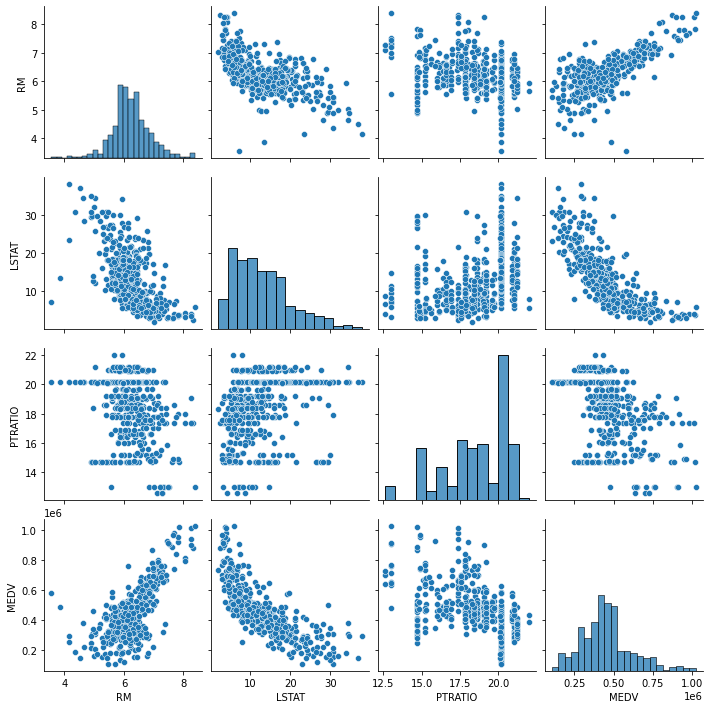

In [10]:
#graph of featres of dataset
sns.pairplot(df)

In [11]:
#defining x and y variables
x=df[['RM']]
y=df['MEDV']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

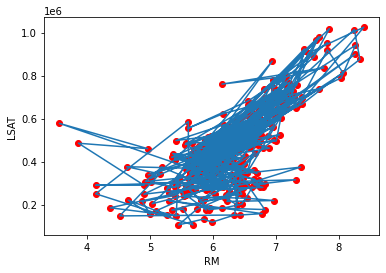

In [12]:
#plotting x and y values
plt.scatter(x,y,color='r')
plt.xlabel("RM")
plt.ylabel('LSAT')
plt.plot(x,y)

### LINEAR REGREESSION

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.48610069787324506

In [26]:
ypred=model.predict(x)
print(ypred)

[514289.33114578 486708.14799351 623539.47220346 590048.03551857
 616733.72571135 488320.03532059 413456.8239073  442112.59861095
 345220.26039422 412024.03517211 478827.80995001 412919.5281316
 391427.69710386 402173.61261773 428501.10562672 381577.27454948
 399666.23233116 409516.65488554 313878.0068121  362413.72521641
 334295.24628845 405039.1900881  436739.64085402 377816.20411963
 397696.14782029 339489.10545349 377816.20411963 419725.27462372
 499961.44379395 532020.09174367 359906.34492984 424202.73942117
 402352.71120963 357757.16182707 428501.10562672 399308.03514737
 382830.96469277 384442.85201985 405218.28868    517871.30298374
 594704.59890791 549213.55656586 441575.30283526 449097.44369497
 423665.44364547 354354.28858101 372980.54213839 416680.59856146
 303669.38707392 340026.40122918 404680.9929043  431903.97887277
 502827.02126432 410949.44362073 391248.59851196 635001.78208493
 479902.4015014  557452.09179316 437276.93662971 398233.44359598
 364921.10550298 405218.28

### Polynomial Regreesion

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

LinearRegression()

In [28]:
pol_reg.score(x_poly,y)

0.5749894592153919